## Prepare datasets

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
# Library untuk Model Training dan Evaluation
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import MeanIoU

In [3]:
DATA_PATH = "/content/drive/MyDrive/PROJECT3/1/"

annotations_prepped_train = os.path.join(DATA_PATH, "annotations_prepped_train/")
images_prepped_train = os.path.join(DATA_PATH, "images_prepped_train/")

annotations_prepped_test = os.path.join(DATA_PATH, "annotations_prepped_test/")
images_prepped_test = os.path.join(DATA_PATH, "images_prepped_test/")

Text(0, 0.5, 'Jumlah File')

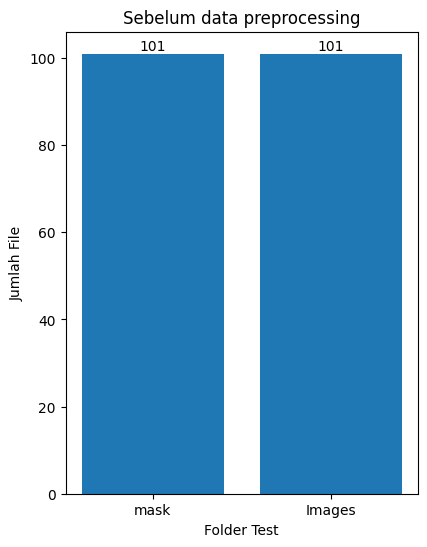

In [4]:
# Membuat daftar file di masing-masing folder
annotations_files_test = os.listdir(annotations_prepped_test)
images_files_test = os.listdir(images_prepped_test)

# Mendapatkan jumlah file di setiap folder
num_annotations_files = len(annotations_files_test)
num_images_files = len(images_files_test)

# Membuat plot sebelum penghapusan
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(["mask", "Images"], [num_annotations_files, num_images_files])
plt.text(0, num_annotations_files, str(num_annotations_files), ha='center', va='bottom', fontsize=10)
plt.text(1, num_images_files, str(num_images_files), ha='center', va='bottom', fontsize=10)
plt.title("Sebelum data preprocessing")
plt.xlabel("Folder Test")
plt.ylabel("Jumlah File")

Text(0, 0.5, 'Jumlah File')

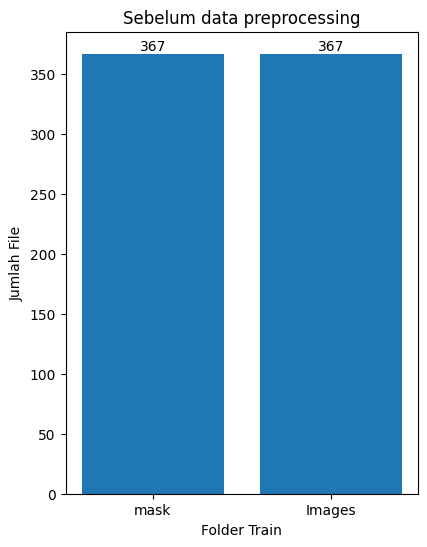

In [5]:
# Membuat daftar file di masing-masing folder
annotations_files_train = os.listdir(annotations_prepped_train)
images_files_train = os.listdir(images_prepped_train)

# Mendapatkan jumlah file di setiap folder
num_annotations_files = len(annotations_files_train)
num_images_files = len(images_files_train)

# Membuat plot sebelum penghapusan
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(["mask", "Images"], [num_annotations_files, num_images_files])
plt.text(0, num_annotations_files, str(num_annotations_files), ha='center', va='bottom', fontsize=10)
plt.text(1, num_images_files, str(num_images_files), ha='center', va='bottom', fontsize=10)
plt.title("Sebelum data preprocessing")
plt.xlabel("Folder Train")
plt.ylabel("Jumlah File")

In [6]:
def delete_unpaired_files(data_path, annotations_folder, images_folder):
    annotations_path = os.path.join(data_path, annotations_folder)
    images_path = os.path.join(data_path, images_folder)
    annotations_files = os.listdir(annotations_path)
    images_files = os.listdir(images_path)

    for file_name_annotations in annotations_files:
        if file_name_annotations not in images_files:
            file_to_delete = os.path.join(annotations_path, file_name_annotations)
            os.remove(file_to_delete)

    for file_name_images in images_files:
        if file_name_images not in annotations_files:
            file_to_delete = os.path.join(images_path, file_name_images)
            os.remove(file_to_delete)


# Panggil fungsi untuk menghapus file yang tidak memiliki pasangan
delete_unpaired_files(DATA_PATH, "annotations_prepped_train",  "images_prepped_train")
delete_unpaired_files(DATA_PATH, "annotations_prepped_test",   "images_prepped_test")

Text(0, 0.5, 'Jumlah File')

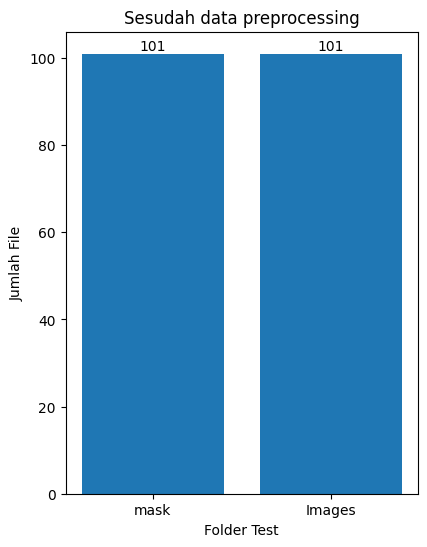

In [7]:
# Membuat daftar file di masing-masing folder
annotations_files_test = os.listdir(annotations_prepped_test)
images_files_test = os.listdir(images_prepped_test)

# Mendapatkan jumlah file di setiap folder
num_annotations_files = len(annotations_files_test)
num_images_files = len(images_files_test)

# Membuat plot sesudah penghapusan
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(["mask", "Images"], [num_annotations_files, num_images_files])
plt.text(0, num_annotations_files, str(num_annotations_files), ha='center', va='bottom', fontsize=10)
plt.text(1, num_images_files, str(num_images_files), ha='center', va='bottom', fontsize=10)
plt.title("Sesudah data preprocessing")
plt.xlabel("Folder Test")
plt.ylabel("Jumlah File")

Text(0, 0.5, 'Jumlah File')

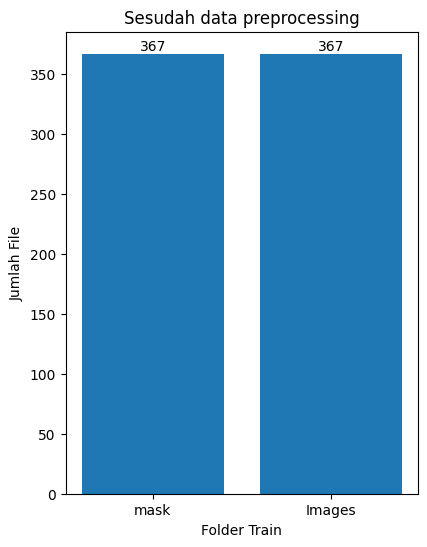

In [8]:
# Membuat daftar file di masing-masing folder
annotations_files_train = os.listdir(annotations_prepped_train)
images_files_train = os.listdir(images_prepped_train)

# Mendapatkan jumlah file di setiap folder
num_annotations_files = len(annotations_files_train)
num_images_files = len(images_files_train)

# Membuat plot sesudah penghapusan
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(["mask", "Images"], [num_annotations_files, num_images_files])
plt.text(0, num_annotations_files, str(num_annotations_files), ha='center', va='bottom', fontsize=10)
plt.text(1, num_images_files, str(num_images_files), ha='center', va='bottom', fontsize=10)
plt.title("Sesudah data preprocessing")
plt.xlabel("Folder Train")
plt.ylabel("Jumlah File")

In [9]:
class ImageSizeChecker:
    def __init__(self, images_folder):
        self.images_folder = images_folder

    def get_image_shapes(self):
        list_image_files = os.listdir(self.images_folder)
        temp_shape = []

        for file_name in list_image_files:
            file = cv.imread(os.path.join(self.images_folder, file_name))
            shape = (file.shape[1], file.shape[0], file.shape[2])
            temp_shape.append(shape)

        return temp_shape

    def check_image_sizes(self):
        image_shapes = self.get_image_shapes()

        if len(set(image_shapes)) == 1:
            print("All images have the same size:", set(image_shapes))
        else:
            print("Data has images with multiple sizes:")
            print(set(image_shapes))


In [10]:
image_size_checker_train = ImageSizeChecker(images_prepped_train)
image_size_checker_train.check_image_sizes()

All images have the same size: {(480, 360, 3)}


In [11]:
image_size_checker_test = ImageSizeChecker(images_prepped_test)
image_size_checker_test.check_image_sizes()

All images have the same size: {(480, 360, 3)}


In [12]:
class MaskSizeChecker:
    def __init__(self, mask_folder):
        self.mask_folder = mask_folder

    def get_mask_shapes(self):
        list_mask_files = os.listdir(self.mask_folder)
        temp_shape = []

        for file_name in list_mask_files:
            file = cv.imread(os.path.join(self.mask_folder, file_name))
            shape = (file.shape[1], file.shape[0], file.shape[2])
            temp_shape.append(shape)

        return temp_shape

    def check_mask_sizes(self):
        mask_shapes = self.get_mask_shapes()

        if len(set(mask_shapes)) == 1:
            print("All masks have the same size:", set(mask_shapes))
        else:
            print("Data has masks with multiple sizes:")
            print(set(mask_shapes))

In [13]:
mask_size_checker = MaskSizeChecker(annotations_prepped_train)
mask_size_checker.check_mask_sizes()

All masks have the same size: {(480, 360, 3)}


In [14]:
mask_size_checker = MaskSizeChecker(annotations_prepped_test)
mask_size_checker.check_mask_sizes()

All masks have the same size: {(480, 360, 3)}


In [15]:
class LabelCounter:
    def __init__(self, image_folder, mask_folder):
        self.image_folder = image_folder
        self.mask_folder = mask_folder

    def get_labels(self):
        list_image_files = os.listdir(self.image_folder)
        temp_label = []

        for file_name in list_image_files:
            mask_file = os.path.join(self.mask_folder, file_name)
            file = cv.imread(mask_file)
            label = np.unique(file)
            temp_label.append(label)

        return temp_label

    def count_labels(self):
        label_lists = self.get_labels()
        concatenated_labels = np.concatenate(label_lists).ravel().tolist()
        unique_labels, label_counts = np.unique(concatenated_labels, return_counts=True)
        total_labels = len(unique_labels)

        print("Total label:", total_labels)

        plt.bar(unique_labels, label_counts)
        plt.xlabel('Labels')
        plt.ylabel('Total')
        plt.title('Labels')
        plt.show()

Total label: 12


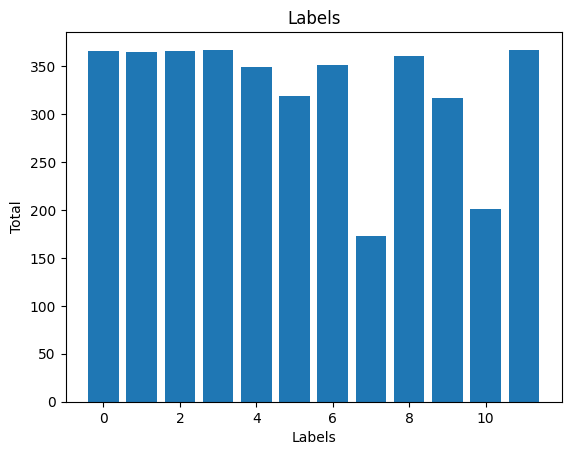

In [16]:
label_counter = LabelCounter(images_prepped_train, annotations_prepped_train)
label_counter.count_labels()

Total label: 12


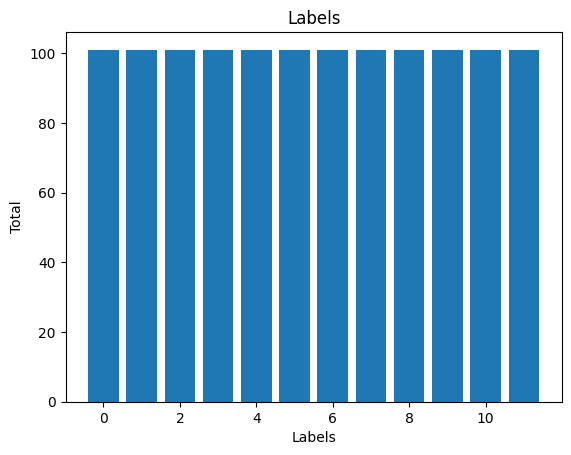

In [17]:
label_counter = LabelCounter(images_prepped_test, annotations_prepped_test)
label_counter.count_labels()

In [18]:
IMAGE_LIST_TRAIN = sorted(os.listdir(images_prepped_train))
MASK_LIST_TRAIN = sorted(os.listdir(annotations_prepped_train))

# Membuat nama file menjadi list
IMAGE_LIST_TRAIN = [images_prepped_train + i for i in IMAGE_LIST_TRAIN]
MASK_LIST_TRAIN  = [annotations_prepped_train + i for i in MASK_LIST_TRAIN]



IMAGE_LIST_TEST = sorted(os.listdir(images_prepped_test))
MASK_LIST_TEST = sorted(os.listdir(annotations_prepped_test))

# Membuat nama file menjadi list
IMAGE_LIST_TEST = [images_prepped_test + i for i in IMAGE_LIST_TEST]
MASK_LIST_TEST  = [annotations_prepped_test + i for i in MASK_LIST_TEST]

In [19]:
from collections import Counter

# Count the occurrences of each image filename
image_filename_counts = Counter([os.path.basename(image_filename) for image_filename in IMAGE_LIST_TRAIN])

# Create filtered lists excluding duplicate filenames
filtered_image_list = []
filtered_mask_list = []

for image_filename, mask_filename in zip(IMAGE_LIST_TRAIN, MASK_LIST_TRAIN ):
    base_image_filename = os.path.basename(image_filename)

    # Check if the image filename occurs only once (not a duplicate)
    if image_filename_counts[base_image_filename] == 1:
        filtered_image_list.append(image_filename)
        filtered_mask_list.append(mask_filename)

# Create the TensorFlow Dataset using the filtered lists
dataset_train = tf.data.Dataset.from_tensor_slices((filtered_image_list, filtered_mask_list))
for image, mask in dataset_train.take(3):
    print(image)
    print(mask)

tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/images_prepped_train/0001TP_006690.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/annotations_prepped_train/0001TP_006690.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/images_prepped_train/0001TP_006720.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/annotations_prepped_train/0001TP_006720.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/images_prepped_train/0001TP_006750.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/annotations_prepped_train/0001TP_006750.png', shape=(), dtype=string)


<ipython-input-20-d3055b5c0930>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filtered_image_list[N])
<ipython-input-20-d3055b5c0930>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(filtered_mask_list[N])


Text(0.5, 1.0, 'Segmentation')

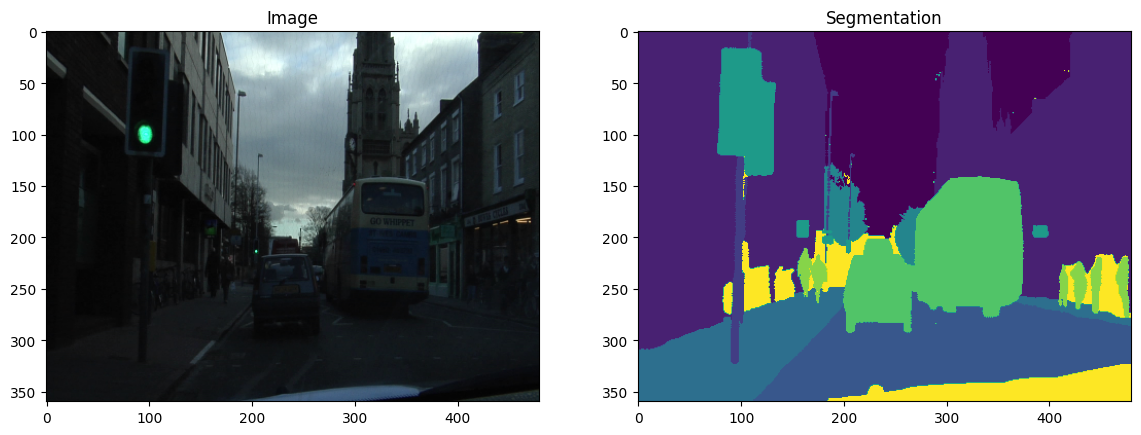

In [20]:
N = 2
img = imageio.imread(filtered_image_list[N])
mask = imageio.imread(filtered_mask_list[N])
#mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask)
arr[1].set_title('Segmentation')

<ipython-input-21-efd64a34ce48>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(IMAGE_LIST_TRAIN[N])
<ipython-input-21-efd64a34ce48>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(MASK_LIST_TRAIN[N])


Text(0.5, 1.0, 'Segmentation')

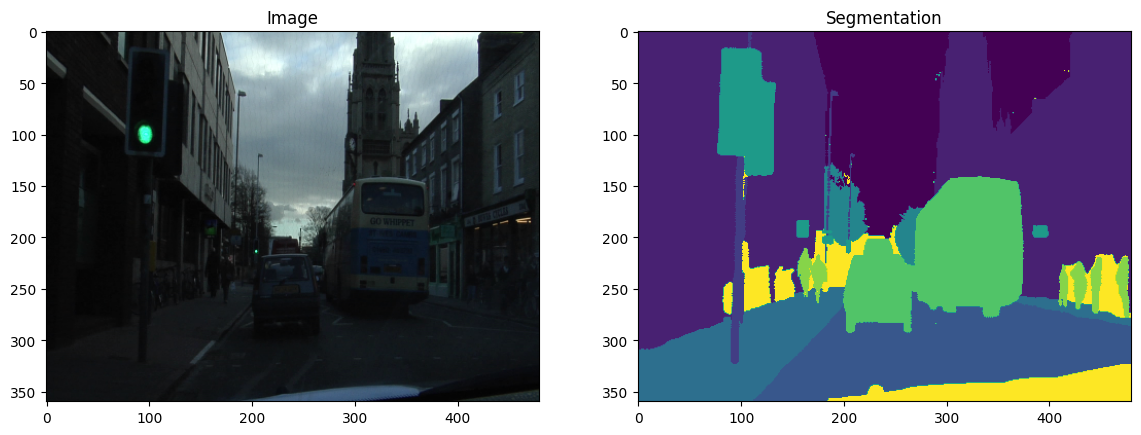

In [21]:
N = 2
img = imageio.imread(IMAGE_LIST_TRAIN[N])
mask = imageio.imread(MASK_LIST_TRAIN[N])
#mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask)
arr[1].set_title('Segmentation')

In [22]:
# Count the occurrences of each image filename
image_filename_counts = Counter([os.path.basename(image_filename) for image_filename in IMAGE_LIST_TEST])

# Create filtered lists excluding duplicate filenames
filtered_image_list = []
filtered_mask_list = []

for image_filename, mask_filename in zip(IMAGE_LIST_TEST, MASK_LIST_TEST):
    base_image_filename = os.path.basename(image_filename)

    # Check if the image filename occurs only once (not a duplicate)
    if image_filename_counts[base_image_filename] == 1:
        filtered_image_list.append(image_filename)
        filtered_mask_list.append(mask_filename)

# Create the TensorFlow Dataset using the filtered lists
dataset_test = tf.data.Dataset.from_tensor_slices((filtered_image_list, filtered_mask_list))
for image, mask in dataset_test.take(3):
    print(image)
    print(mask)

tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/images_prepped_test/0016E5_07959.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/annotations_prepped_test/0016E5_07959.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/images_prepped_test/0016E5_07961.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/annotations_prepped_test/0016E5_07961.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/images_prepped_test/0016E5_07963.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PROJECT3/1/annotations_prepped_test/0016E5_07963.png', shape=(), dtype=string)


In [23]:
# Menghitung jumlah elemen dalam dataset
num_elements = dataset_test.cardinality().numpy()

print("Jumlah elemen dalam dataset:", num_elements)

Jumlah elemen dalam dataset: 101


In [24]:
def process_path(JOIN_IMAGE, JOIN_MASK):
    img = tf.io.read_file(JOIN_IMAGE)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(JOIN_MASK)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (192, 256), method='nearest')
    input_mask = tf.image.resize(mask, (192, 256), method='nearest')

    return input_image, input_mask

# Code from https://www.kaggle.com/code/sudoshivam/u-net-semantic-segmentation-for-self-driving-cars

In [25]:
DATASET_LIST_TRAIN_PROCESS = dataset_train.map(process_path)
IMAGE_LIST_TRAIN_PROCESS = DATASET_LIST_TRAIN_PROCESS.map(preprocess)

In [26]:
DATASET_LIST_TEST_PROCESS = dataset_test.map(process_path)
IMAGE_LIST_TEST_PROCESS = DATASET_LIST_TEST_PROCESS.map(preprocess)

In [27]:
uniques = set()

for img, mask in IMAGE_LIST_TRAIN_PROCESS.take(len(IMAGE_LIST_TRAIN_PROCESS)):
    uniques.update(np.unique(mask.numpy()))

print("Number of classes: ", uniques)

Number of classes:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [28]:
uniques = set()

for img, mask in IMAGE_LIST_TEST_PROCESS.take(5000):
    uniques.update(np.unique(mask.numpy()))

print("Number of classes: ", uniques)

Number of classes:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [29]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

(192, 256, 1)


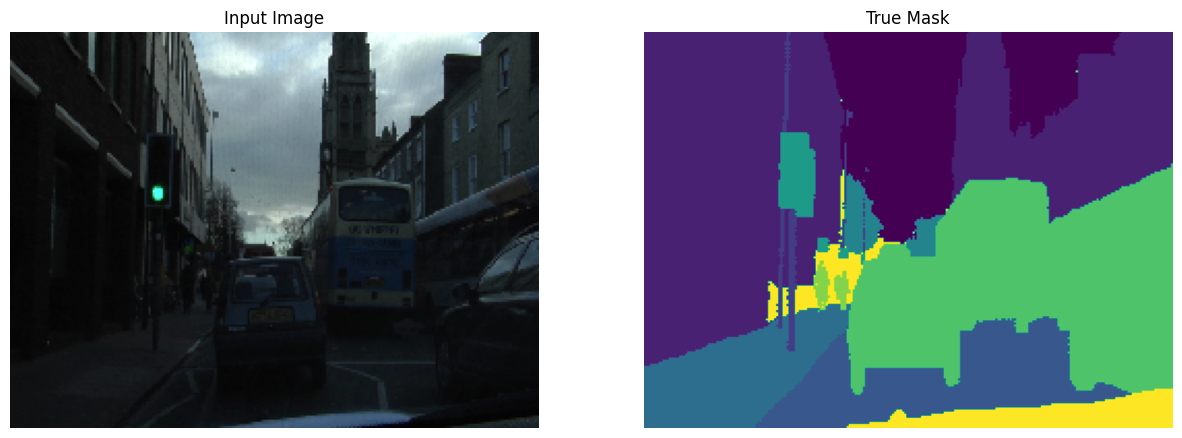

In [30]:
for image, mask in IMAGE_LIST_TRAIN_PROCESS.take(1):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

In [31]:
def conv_block(inputs=None, n_filters=64, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block

    Arguments:
        inputs -- Input tensor
        n_filters -- Number of filters for the convolutional layers
        dropout_prob -- Dropout probability
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns:
        next_layer, skip_connection --  Next layer and skip connection outputs
    """

    ### START CODE HERE
    conv = Conv2D(filters=n_filters, # Number of filters
                  kernel_size=3, # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(inputs)
    conv = Conv2D(filters=n_filters, # Number of filters
                  kernel_size=3, # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(conv)
    ### END CODE HERE

    # if dropout_prob > 0 add a dropout layer, with the variable dropout_prob as parameter
    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)

    # if max_pooling is True add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2,2))(conv)

    else:
        next_layer = conv

    skip_connection = conv

    return next_layer, skip_connection

In [32]:
def conv_block(inputs, filters, pool=True):
    x = Conv2D(filters, 3, padding='same')(inputs) #convolution (Downsampling) layer
    x = BatchNormalization()(x) #Batch normalization
    x = Activation('relu')(x) #ReLU (Rectified Linear Unit) Activation Function

    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if pool == True:
        p = MaxPool2D((2,2))(x) #Maxpooling layer
        return x, p # x is filters and p is output feature map obtained after maxpooling
    else:
        return x


def build_unet(shape, num_classes):   # this function is used to create unet architecture using conv_block function
    inputs = Input(shape)

    filters_x = [16,32,48,64,64,48,32,16]
    filters_b = [128]

    # Encoder : Encoder path consist of 4 blocks
    # Encoder path is used to capture context (feature map) of input image in order to do segmentation
    x1, p1 = conv_block(inputs, filters_x[0], pool=True)
    x2, p2 = conv_block(p1, filters_x[1], pool=True)
    x3, p3 = conv_block(p2, filters_x[2], pool=True)
    x4, p4 = conv_block(p3, filters_x[3], pool=True)

    # Bridge
    b1 = conv_block(p4, filters_b[0], pool=False) #Bridge is used to pass context from Encoder layer to Decoder layer

    # Decoder : Decoder path consist of 4 blocks
    # Decoder path is used to reconstruct segmentation image from contracted image obtained from encoder path
    u1 = UpSampling2D((2,2), interpolation='bilinear')(b1) #DeConvolution (upsampling) layer for upsizing image.
    c1 = Concatenate()([u1, x4]) #Concatenation layer - It concatenates current image with corresponding image from encoder path to increase pixel precision.
    x5 = conv_block(c1, filters_x[4], pool=False) #convolution layer with no pooling

    u2 = UpSampling2D((2,2), interpolation='bilinear')(x5)
    c2 = Concatenate()([u2, x3])
    x6 = conv_block(c2, filters_x[5], pool=False)

    u3 = UpSampling2D((2,2), interpolation='bilinear')(x6)
    c3 = Concatenate()([u3, x2])
    x7 = conv_block(c3, filters_x[6], pool=False)

    u4 = UpSampling2D((2,2), interpolation='bilinear')(x7)
    c4 = Concatenate()([u4, x1])
    x8 = conv_block(c4, filters_x[7], pool=False)

    # Output Layer
    output = Conv2D(num_classes, 1, padding='same', activation='softmax')(x8) # Output layer to create segmentation image of same size.
    # 'softmax' activation function is used to classify pixels into different classes

    return Model(inputs, output)

In [33]:
## Define the resolution of the images and the number of classes
H = 192
W = 256
num_classes = 12
#calling function to build model
unet = build_unet((H, W, 3), num_classes)

In [34]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 192, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 192, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

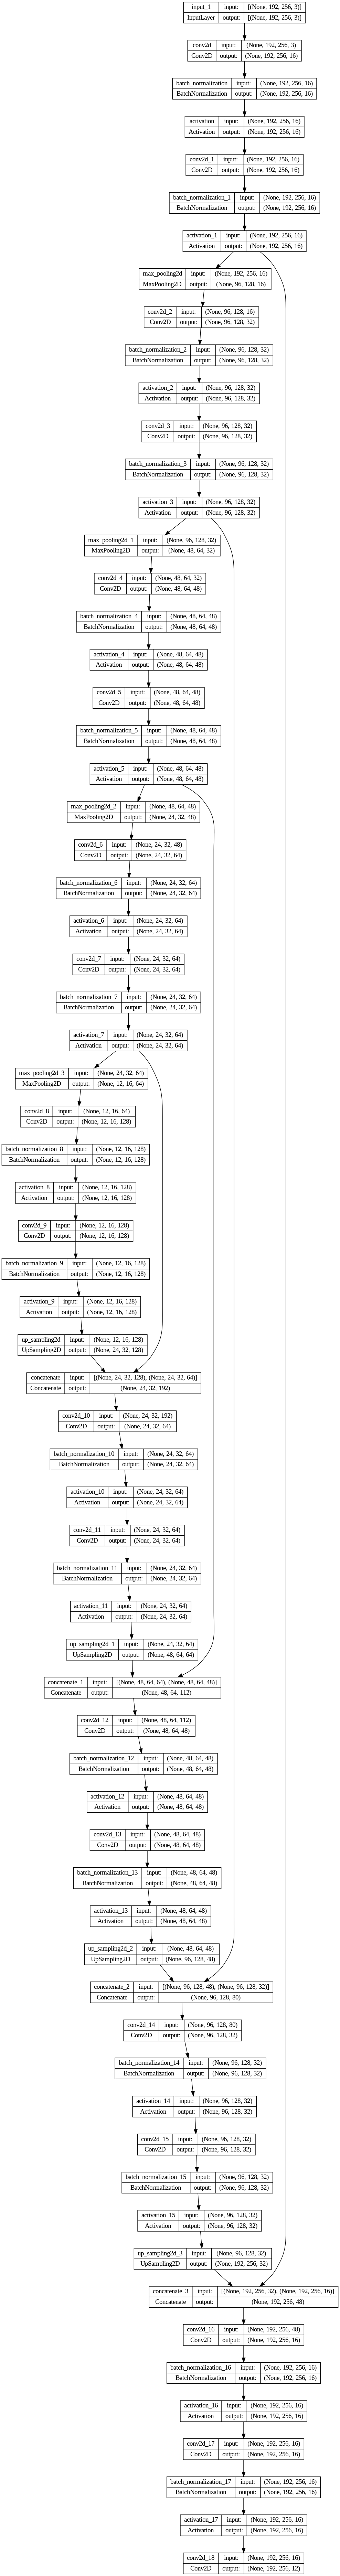

In [35]:
tf.keras.utils.plot_model(unet, show_shapes = True)

In [36]:
# Definisi fungsi Dice Coefficient
def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Mengonversi y_true ke float32
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2 * intersection) / (union + 1e-7)  # Tambahkan epsilon untuk menghindari pembagian dengan nol
    return dice

# Definisi fungsi Dice Loss
def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)


In [37]:
unet.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=dice_loss,  # Menggunakan Dice Loss sebagai fungsi loss
             metrics=['accuracy', dice_coefficient])  # Menggunakan Dice Coefficient sebagai metrik evaluasi

In [38]:
EPOCHS = 10
BUFFER_SIZE = 1000
BATCH_SIZE = 1
map_dataset_train = IMAGE_LIST_TRAIN_PROCESS.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# Splitting data to training set and val set
map_dataset_test = IMAGE_LIST_TEST_PROCESS.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset = map_dataset_train
val_dataset = map_dataset_test
# ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=1, min_lr=1e-6)
early_stop = tf.keras.callbacks.EarlyStopping(patience=2)

In [39]:
# Mengukur waktu pelatihan model
import time
start_time = time.time()

model_history1 = unet.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr]) # callbacks=[reduce_lr,early_stop]

# Menghitung waktu pelatihan
training_time = time.time() - start_time
print("Total training time: {:.2f} seconds".format(training_time))
print("Total training time: {:.2f} hours".format(training_time/3600))

Epoch 1/10
367/367 [==============================] - 36s 22ms/step - loss: -0.4901 - accuracy: 0.0828 - dice_coefficient: 1.4901 - val_loss: -0.5206 - val_accuracy: 0.0584 - val_dice_coefficient: 1.5206 - lr: 0.0010
Epoch 2/10
367/367 [==============================] - 5s 15ms/step - loss: -0.4901 - accuracy: 0.0827 - dice_coefficient: 1.4901 - val_loss: -0.5206 - val_accuracy: 0.0748 - val_dice_coefficient: 1.5206 - lr: 0.0010
Epoch 3/10
367/367 [==============================] - 6s 18ms/step - loss: -0.4901 - accuracy: 0.0826 - dice_coefficient: 1.4901 - val_loss: -0.5206 - val_accuracy: 0.0699 - val_dice_coefficient: 1.5206 - lr: 1.0000e-04
Epoch 4/10
367/367 [==============================] - 5s 15ms/step - loss: -0.4901 - accuracy: 0.0826 - dice_coefficient: 1.4901 - val_loss: -0.5206 - val_accuracy: 0.0684 - val_dice_coefficient: 1.5206 - lr: 1.0000e-05
Epoch 5/10
367/367 [==============================] - 6s 18ms/step - loss: -0.4901 - accuracy: 0.0826 - dice_coefficient: 1.490

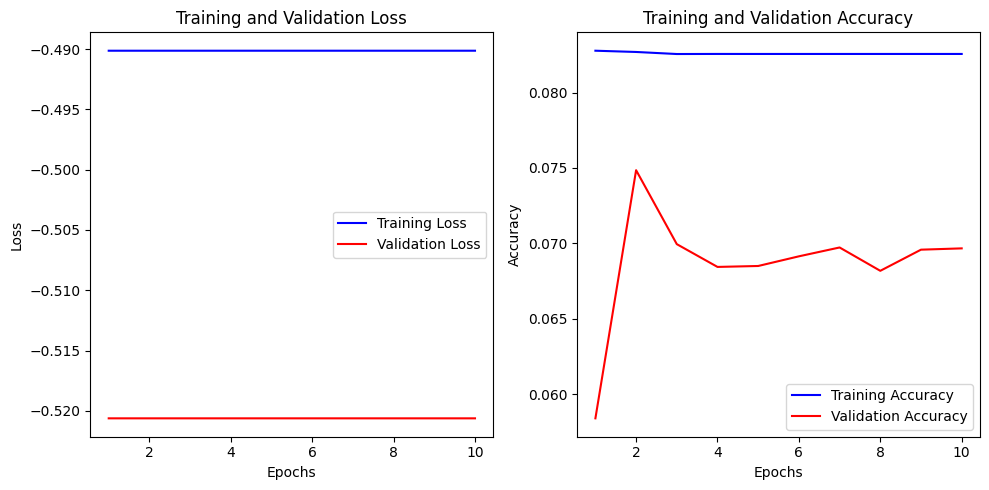

In [40]:
def plot_loss_and_accuracy(model_history):
    # Get the training and validation loss and accuracy values from the model history
    train_loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']
    train_accuracy = model_history.history['accuracy']
    val_accuracy = model_history.history['val_accuracy']

    epochs = range(1, len(train_loss) + 1)

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_loss_and_accuracy(model_history1)

In [41]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [42]:
def show_predictions(unet = unet, dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

1/1 [==============================] - 1s 597ms/step


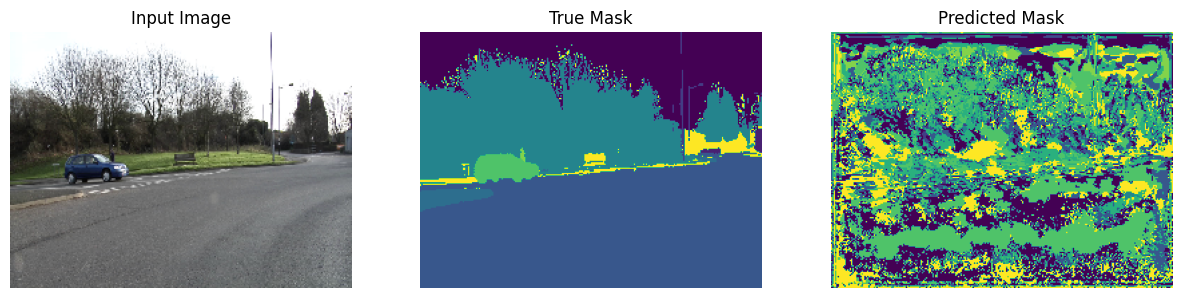

1/1 [==============================] - 0s 52ms/step


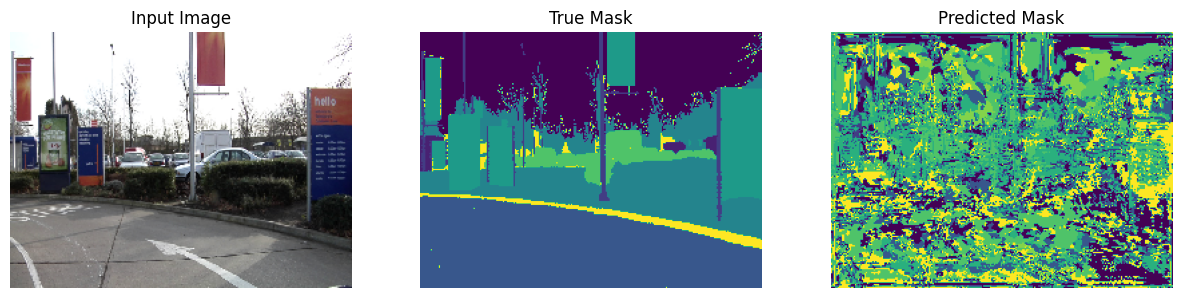

1/1 [==============================] - 0s 68ms/step


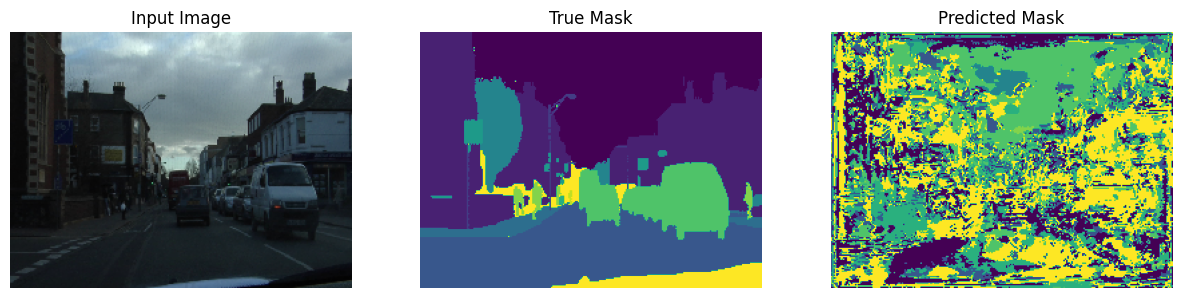

1/1 [==============================] - 0s 60ms/step


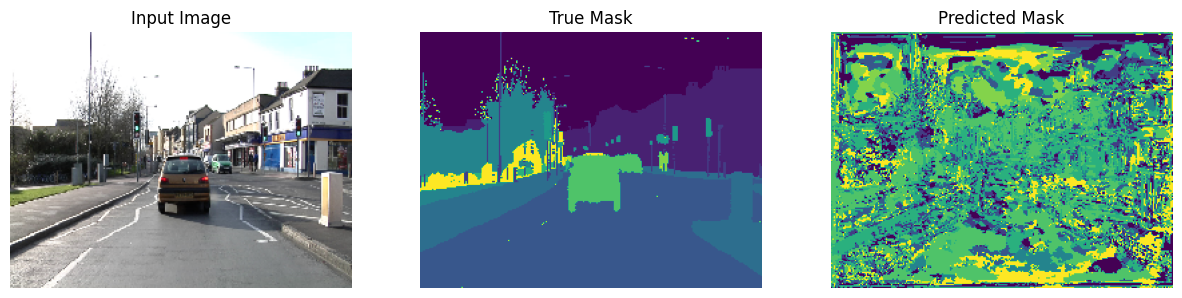

1/1 [==============================] - 0s 29ms/step


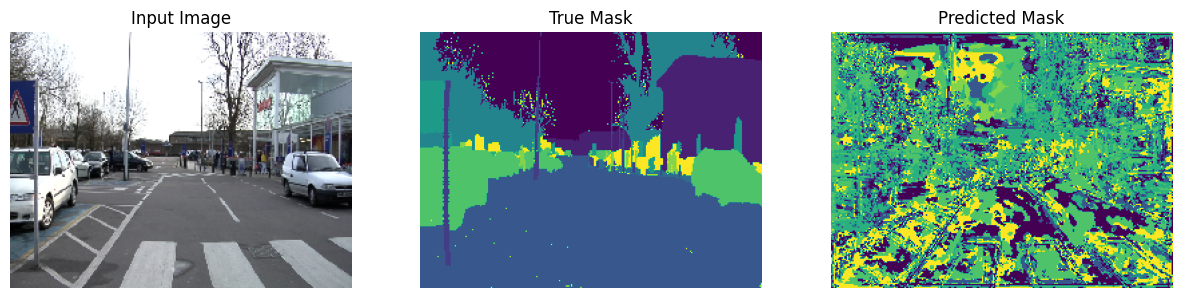

1/1 [==============================] - 0s 31ms/step


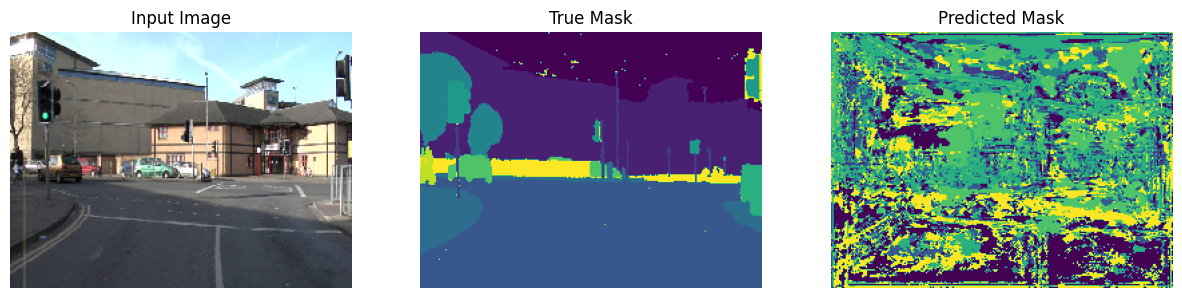

In [43]:
show_predictions(unet,train_dataset, 6)

1/1 [==============================] - 0s 58ms/step


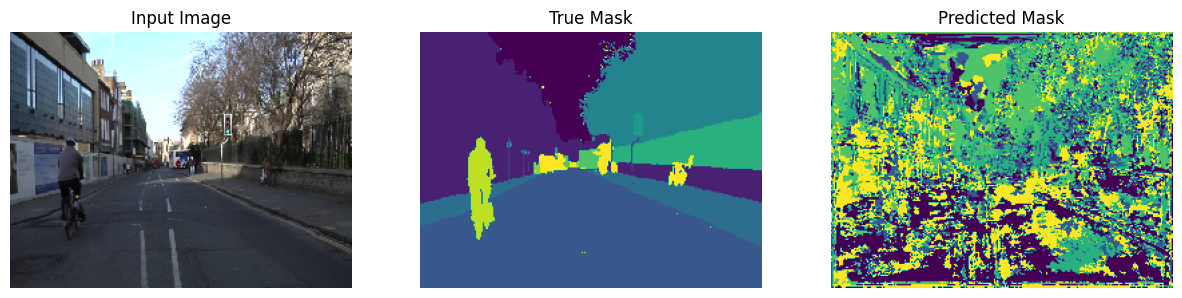

1/1 [==============================] - 0s 78ms/step


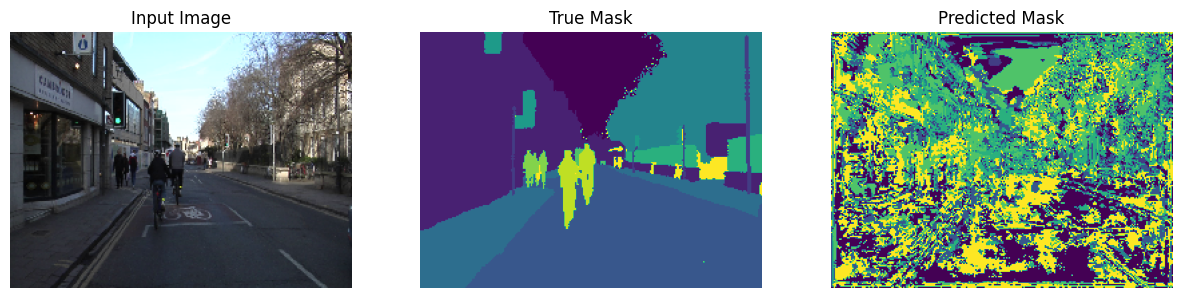

1/1 [==============================] - 0s 72ms/step


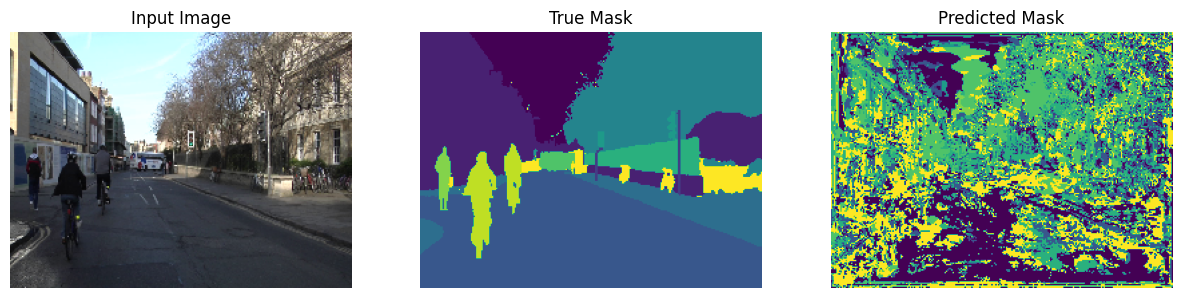

1/1 [==============================] - 0s 30ms/step


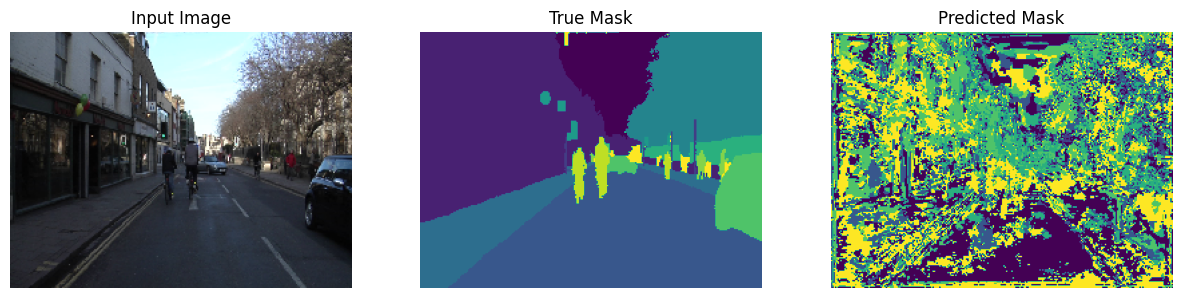

1/1 [==============================] - 0s 32ms/step


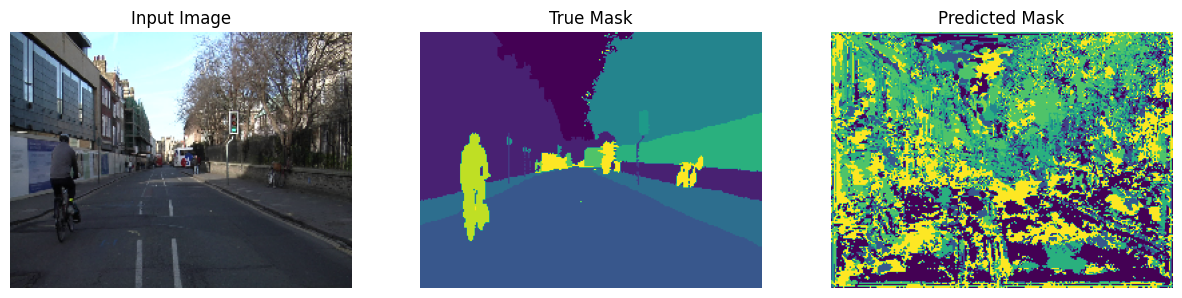

1/1 [==============================] - 0s 30ms/step


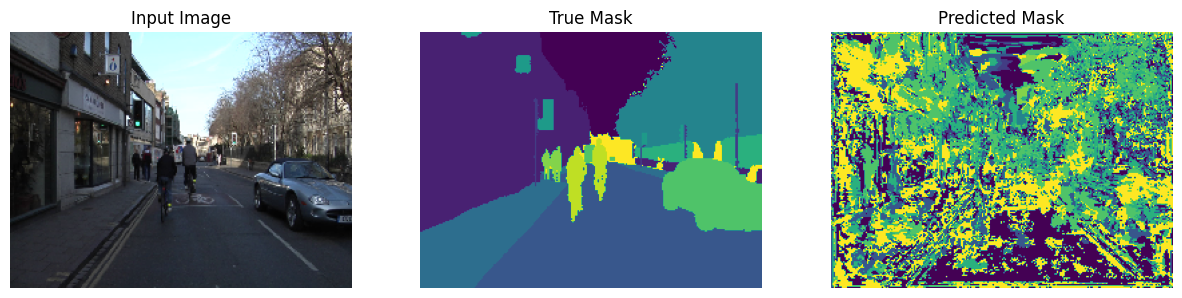

In [45]:
show_predictions(unet,val_dataset, 6)